# Initial Value Problems and ODEs

Consider an ODE:

$$ 
\begin{align}
\frac{dy(t)}{dt} = -3y(t)\sin(t), && y(t=0) = \frac{\pi}{\sqrt{2}},
\end{align}
$$

The exact solution is $ y(t) = \pi e^{3(\cos{t-1})}/\sqrt{2}$. <br>
**TODO: Need to show work...**

### Forward Euler Method
While it is nice to have the exact solution, we can also implement the forward Euler method to solve this ODE numerically:
$$ y(t_{n+1}) = y(t_n) + \Delta t f(t_n,y(t_n))$$

where $f(t_n, y(t_n) ) = \frac{dy(t)}{dt} = -3y(t)\sin(t) $

Let $ t = [0 : \Delta t: 5]$, where $\Delta t = 2^{-2}, 2^{-3}, \dots, t^{-8}$. 

We can use the forward Euler method to evaluate the function at each time $t$. To evaluate the accuracy, we can calculate the error from the exact solution, $|y_{true} - y_{num}|$, for each $t = [0 : \Delta t: 5]$.

The average error over all time steps for each step size $\Delta t$ is listed below, as well as a plot of the log (err) vs. log ($\Delta t$). Using polyfit, we can find the slope of the best fit line through this data, using the order of the forward Euler method. In this instance, it is a first order system, so we will only fit a polynomial of degree 1.

In [113]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

dt 	 = 0.25
Avg Err  = 0.06707493251430062

dt 	 = 0.125
Avg Err  = 0.037510198337030974

dt 	 = 0.0625
Avg Err  = 0.020448082228290112

dt 	 = 0.03125
Avg Err  = 0.010795019069449472

dt 	 = 0.015625
Avg Err  = 0.005565428953161987

dt 	 = 0.0078125
Avg Err  = 0.0028286509093506363

dt 	 = 0.00390625
Avg Err  = 0.001426316950608694



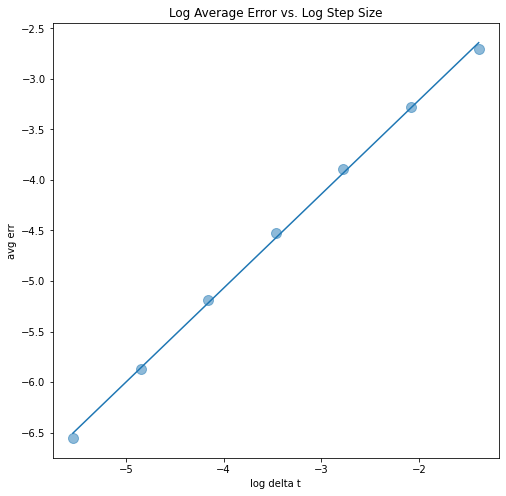

In [114]:
# Exact Solution
y = lambda t: np.pi * np.exp(3*(np.cos(t)-1)) / np.sqrt(2)

# Function for Forward Euler
f1 = lambda tn, yn: -3 * yn * np.sin(tn)

# Function for Heun's Method
# f2 = lambda tn, yn, dt, f1: -3 * (yn + dt * f1(tn,yn) * np.sin(tn + dt))

# Initial value
y0 = np.pi/np.sqrt(2)

# Initial time
t0 = 0

# Final time
tf = 5

# Step sizes to evaluate
dt = [2**(-2), 2**(-3), 2**(-4), 2**(-5), 2**(-6), 2**(-7), 2**(-8)]


def y_fe(y, f1, y0, t0, tf, dt):
    """
    Forward Euler function.
    """
    
    err = [0]
    yn1 = [y0]
    num_points = int( (tf - dt) / dt)
    points = np.linspace(dt, tf, num_points + 1)
    
    for i in points:
        yn1_next = yn1[-1] + dt * f1(i - dt, yn1[-1])
        yn1.append(yn1_next)
        error = np.abs(y(i) - yn1[-1])
        err.append(error)
        
    mean_error = np.average(err)
    
    return yn1, mean_error
        

# Average error over all steps evaluated in forward Euler for each dt (t0 to tf, step size: dt)
err_fe = []

# Calculate forward Euler and error for each dt
for i in range(len(dt)):
    
    params = {'y':y, 'f1':f1, 'y0':y0, 't0':t0, 'tf':tf, 'dt':dt[i]}
    yn1, mean_err = y_fe(**params)
    err_fe.append(mean_err)
    print(f'dt \t = {dt[i]}')
    print(f'Avg Err  = {err_fe[-1]}')
    print()

log_dt = np.log(dt)
log_err_fe = np.log(err_fe)

plt.figure(figsize=[8,8])
plt.xlabel('log delta t')
plt.ylabel('avg err')
plt.title('Log Average Error vs. Log Step Size')
plt.scatter(log_dt, log_err_fe, s=100, alpha=.5)

fit = np.polyfit(log_dt, log_err_fe, 1)

polyfit_func = lambda t: fit[0] * t + fit[1]
polyfit_data = []
for i in log_dt:
    polyfit_data.append(polyfit_func(i))
    
plt.plot(log_dt, polyfit_data)